In [14]:
import numpy as np
import pandas as pd
import requests
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import time

In [15]:
df = pd.read_csv('C:/Users/ksrad/Downloads/ML_PRJ/Earthquake1.xls.csv')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24007 entries, 0 to 24006
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         24007 non-null  float64
 1   date       24007 non-null  object 
 2   time       24007 non-null  object 
 3   lat        24007 non-null  float64
 4   long       24007 non-null  float64
 5   country    24007 non-null  object 
 6   city       11754 non-null  object 
 7   area       12977 non-null  object 
 8   direction  10062 non-null  object 
 9   dist       10062 non-null  float64
 10  depth      24007 non-null  float64
 11  xm         24007 non-null  float64
 12  md         24007 non-null  float64
 13  richter    24007 non-null  float64
 14  mw         5003 non-null   float64
 15  ms         24007 non-null  float64
 16  mb         24007 non-null  float64
dtypes: float64(11), object(6)
memory usage: 3.1+ MB


In [17]:
df.describe()

,id,lat,long,dist,depth,xm,md,richter,mw,ms,mb
count,2.400700e+04,24007.000000,24007.000000,10062.000000,24007.000000,24007.000000,24007.000000,24007.000000,5003.000000,24007.000000,24007.000000
mean,1.991982e+13,37.929474,30.773229,3.175015,18.491773,4.056038,1.912346,2.196826,4.478973,0.677677,1.690561
std,2.060396e+11,2.205605,6.584596,4.715461,23.218553,0.574085,2.059780,2.081417,1.048085,1.675708,2.146108
min,1.910000e+13,29.740000,18.340000,0.100000,0.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.980000e+13,36.190000,26.195000,1.400000,5.000000,3.600000,0.000000,0.000000,4.100000,0.000000,0.000000
50%,2.000000e+13,38.200000,28.350000,2.300000,10.000000,3.900000,0.000000,3.500000,4.700000,0.000000,0.000000
75%,2.010000e+13,39.360000,33.855000,3.600000,22.400000,4.400000,3.800000,4.000000,5.000000,0.000000,4.100000
max,2.020000e+13,46.350000,48.000000,95.400000,225.000000,7.900000,7.400000,7.200000,7.700000,7.900000,7.100000


In [18]:
df.shape

(24007, 17)

In [19]:
df.head()

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0


In [20]:
df.columns

Index(['id', 'date', 'time', 'lat', 'long', 'country', 'city', 'area',
       'direction', 'dist', 'depth', 'xm', 'md', 'richter', 'mw', 'ms', 'mb'],
      dtype='object')

##Data Preprocessing

In [21]:
df = df.drop('id',axis=1)

In [22]:
import datetime
import time
import pandas as pd

# Initialize an empty list for timestamps
timestamp = []

# Iterate over date and time columns in the DataFrame
for d, t in zip(df['date'], df['time']):
    try:
        # Parse date and time into a datetime object
        ts = datetime.datetime.strptime(d + ' ' + t, '%Y.%m.%d %I:%M:%S %p')
        # Convert datetime object to a Unix timestamp
        timestamp.append(time.mktime(ts.timetuple()))
    except (ValueError, OverflowError):
        # Append None for invalid date/time combinations
        timestamp.append(None)

# Create a new Series from the timestamps list
timeStamp = pd.Series(timestamp)

# Add the timestamp series to the DataFrame
df['Timestamp'] = timeStamp.values

# Drop rows where Timestamp is None (invalid date/time)
df = df.dropna(subset=['Timestamp'])

# Drop the original date and time columns
final_data = df.drop(['date', 'time'], axis=1)

# Display the first few rows of the final DataFrame
print(final_data.head())


     lat   long country     city                 area   direction  dist  \
0  39.04  40.38  turkey   bingol           baliklicay        west   0.1   
1  40.79  30.09  turkey  kocaeli      bayraktar_izmit        west   0.1   
2  38.58  27.61  turkey   manisa           hamzabeyli  south_west   0.1   
3  39.47  36.44  turkey    sivas  kahvepinar_sarkisla  south_west   0.1   
4  40.80  30.24  turkey  sakarya      meseli_serdivan  south_west   0.1   

   depth   xm   md  richter  mw   ms   mb     Timestamp  
0   10.0  4.1  4.1      0.0 NaN  0.0  0.0  1.053370e+09  
1    5.2  4.0  3.8      4.0 NaN  0.0  0.0  1.185907e+09  
2    0.0  3.7  0.0      0.0 NaN  0.0  3.7  2.633299e+08  
3   10.0  3.5  3.5      0.0 NaN  0.0  0.0  8.589709e+08  
4    7.0  4.3  4.3      0.0 NaN  0.0  0.0  9.546173e+08  


In [23]:
df.dtypes

date          object
time          object
lat          float64
long         float64
country       object
city          object
area          object
direction     object
dist         float64
depth        float64
xm           float64
md           float64
richter      float64
mw           float64
ms           float64
mb           float64
Timestamp    float64
dtype: object

In [24]:
# Data Encoding
label_encoder = preprocessing.LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
      label_encoder.fit(df[col])
      df[col] = label_encoder.transform(df[col])
df.dtypes

date           int32
time           int32
lat          float64
long         float64
country        int32
city           int32
area           int32
direction      int32
dist         float64
depth        float64
xm           float64
md           float64
richter      float64
mw           float64
ms           float64
mb           float64
Timestamp    float64
dtype: object

In [25]:
df.isnull().sum()

date             0
time             0
lat              0
long             0
country          0
city             0
area             0
direction        0
dist         12249
depth            0
xm               0
md               0
richter          0
mw           18680
ms               0
mb               0
Timestamp        0
dtype: int64

In [26]:
# Imputing Missing Values with Mean
si=SimpleImputer(missing_values = np.nan, strategy="mean")
si.fit(df[["dist","mw"]])
df[["dist","mw"]] = si.transform(df[["dist","mw"]])
df.isnull().sum()

date         0
time         0
lat          0
long         0
country      0
city         0
area         0
direction    0
dist         0
depth        0
xm           0
md           0
richter      0
mw           0
ms           0
mb           0
Timestamp    0
dtype: int64

##Data Visualization

In [57]:
import plotly.express as px
px.scatter(df, x='richter',y='xm', color="direction")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'richter=%{x}<br>xm=%{y}<br>direction=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': array([0.875, 0.875, 0.75 , ..., 1.   , 1.   , 1.   ]),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
              'x': array([0.        , 0.57142857, 0.        , ..., 0.57142857, 0.51428571,
                          0.48571429]),
              'xaxis': 'x',
              'y': array([0.15 , 0.125, 0.05 , ..., 0.15 , 0.075, 0.   ]),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'direction'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'richter'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'xm'}}}
})

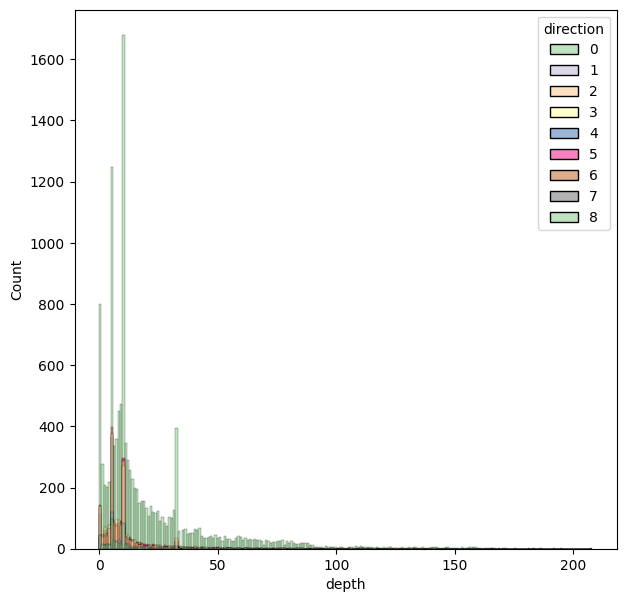

In [28]:
plt.figure(figsize=(7,7))
sns.histplot(data=df, x='depth', hue='direction',palette = 'Accent')
plt.show()

<Figure size 700x700 with 0 Axes>

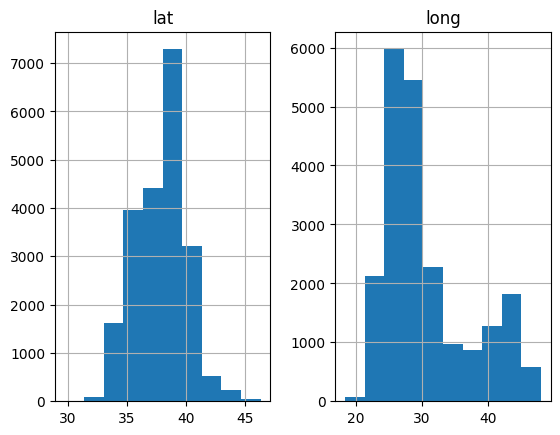

In [29]:
plt.figure(figsize=(7,7))
df[['lat','long']].hist()
plt.show()

C:\Users\ksrad\AppData\Local\Temp\ipykernel_23240\3879995472.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='xm', ylabel='Density'>

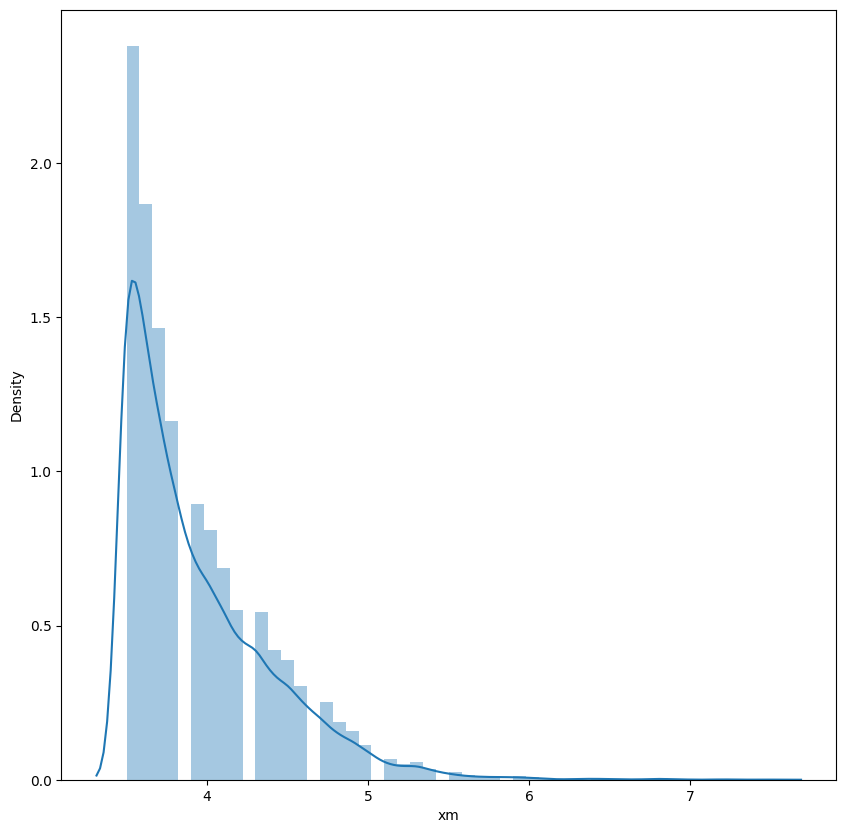

In [30]:
plt.figure(figsize=(10,10))
sns.distplot(df.xm)

Text(0, 0.5, 'ms')

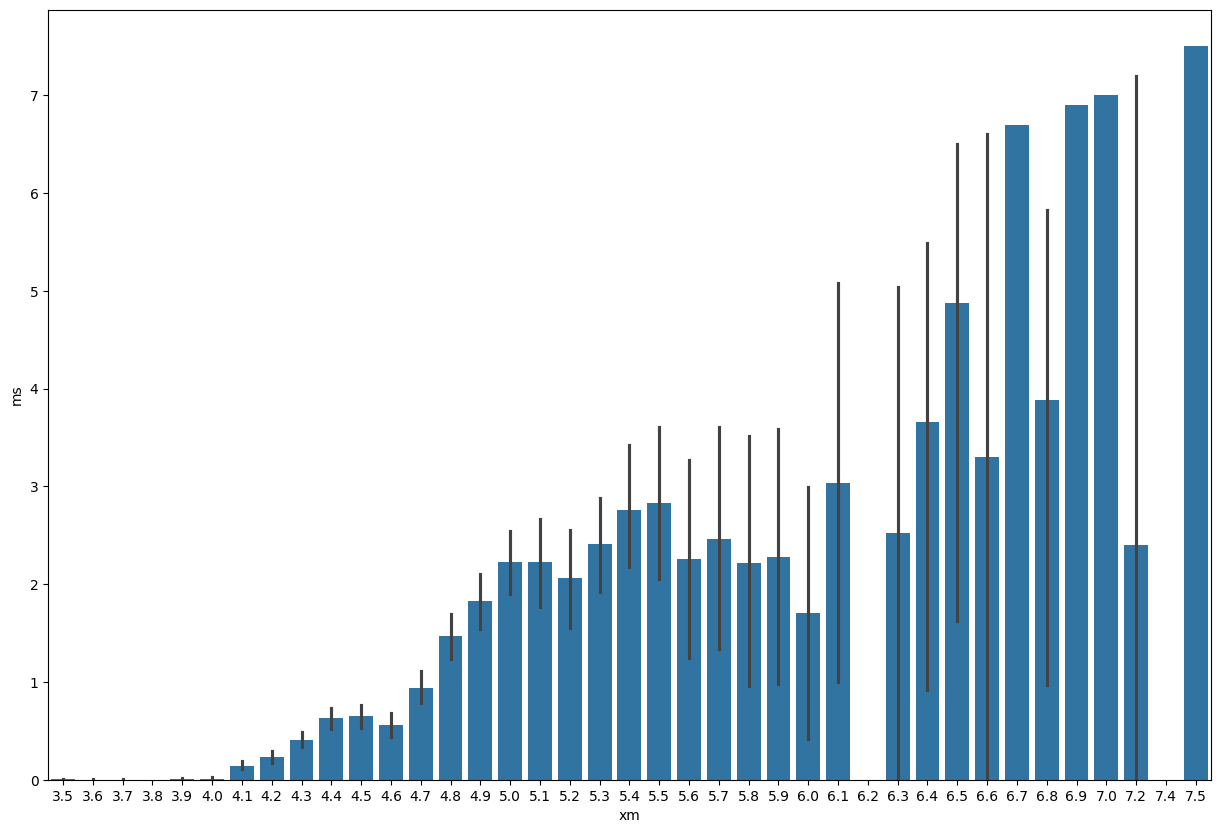

In [31]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['xm'], y=df['ms'])
plt.xlabel('xm')
plt.ylabel('ms')

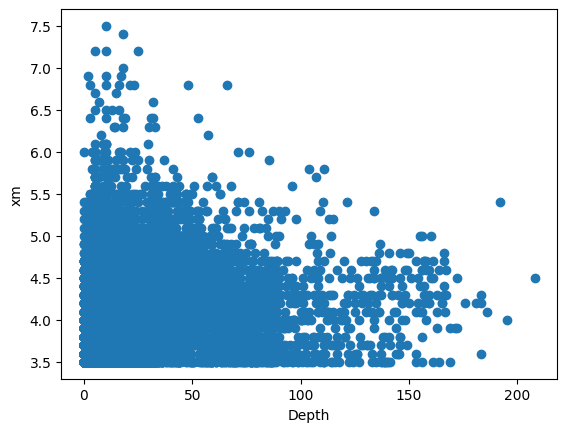

In [32]:
plt.scatter(df.depth, df.xm)
plt.xlabel("Depth")
plt.ylabel("xm")
plt.show()

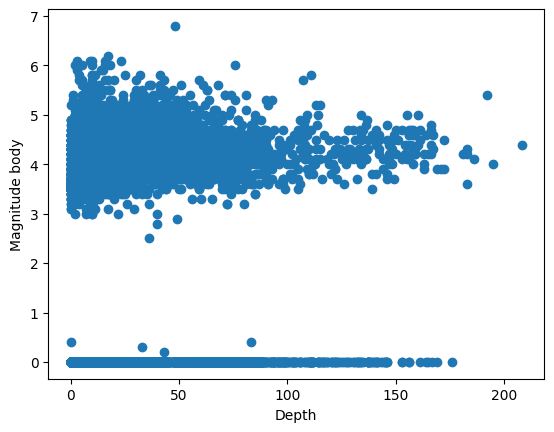

In [33]:
plt.scatter(df.depth, df.mb)
plt.xlabel("Depth")
plt.ylabel("Magnitude body")
plt.show()

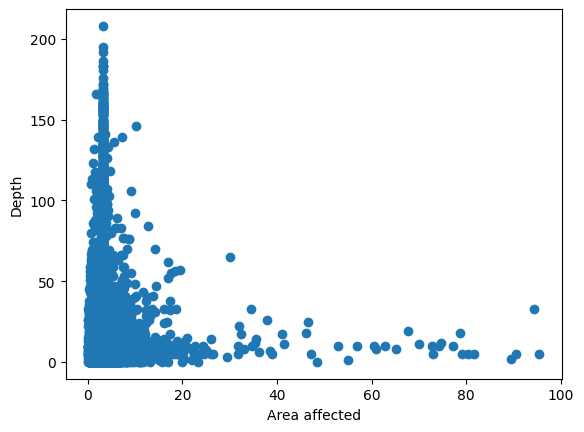

In [34]:
plt.scatter(df.dist, df.depth)
plt.xlabel("Area affected")
plt.ylabel("Depth")
plt.show()

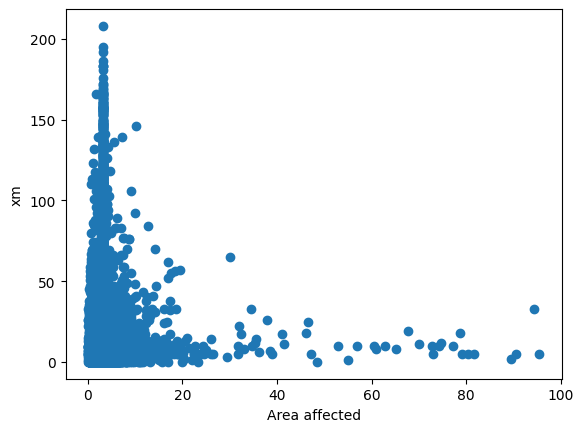

In [35]:
plt.scatter(df.dist, df.depth)
plt.xlabel("Area affected")
plt.ylabel("xm")
plt.show()

##Correlation between Attributes

In [36]:
most_correlated = df.corr()['xm'].sort_values(ascending=False)
most_correlated

xm           1.000000
mb           0.520936
ms           0.466180
richter      0.279849
mw           0.279406
depth        0.248497
area         0.111335
city         0.104102
long         0.091143
direction    0.085191
dist         0.001002
time        -0.001974
lat         -0.043294
country     -0.045622
md          -0.101263
date        -0.184171
Timestamp   -0.194303
Name: xm, dtype: float64

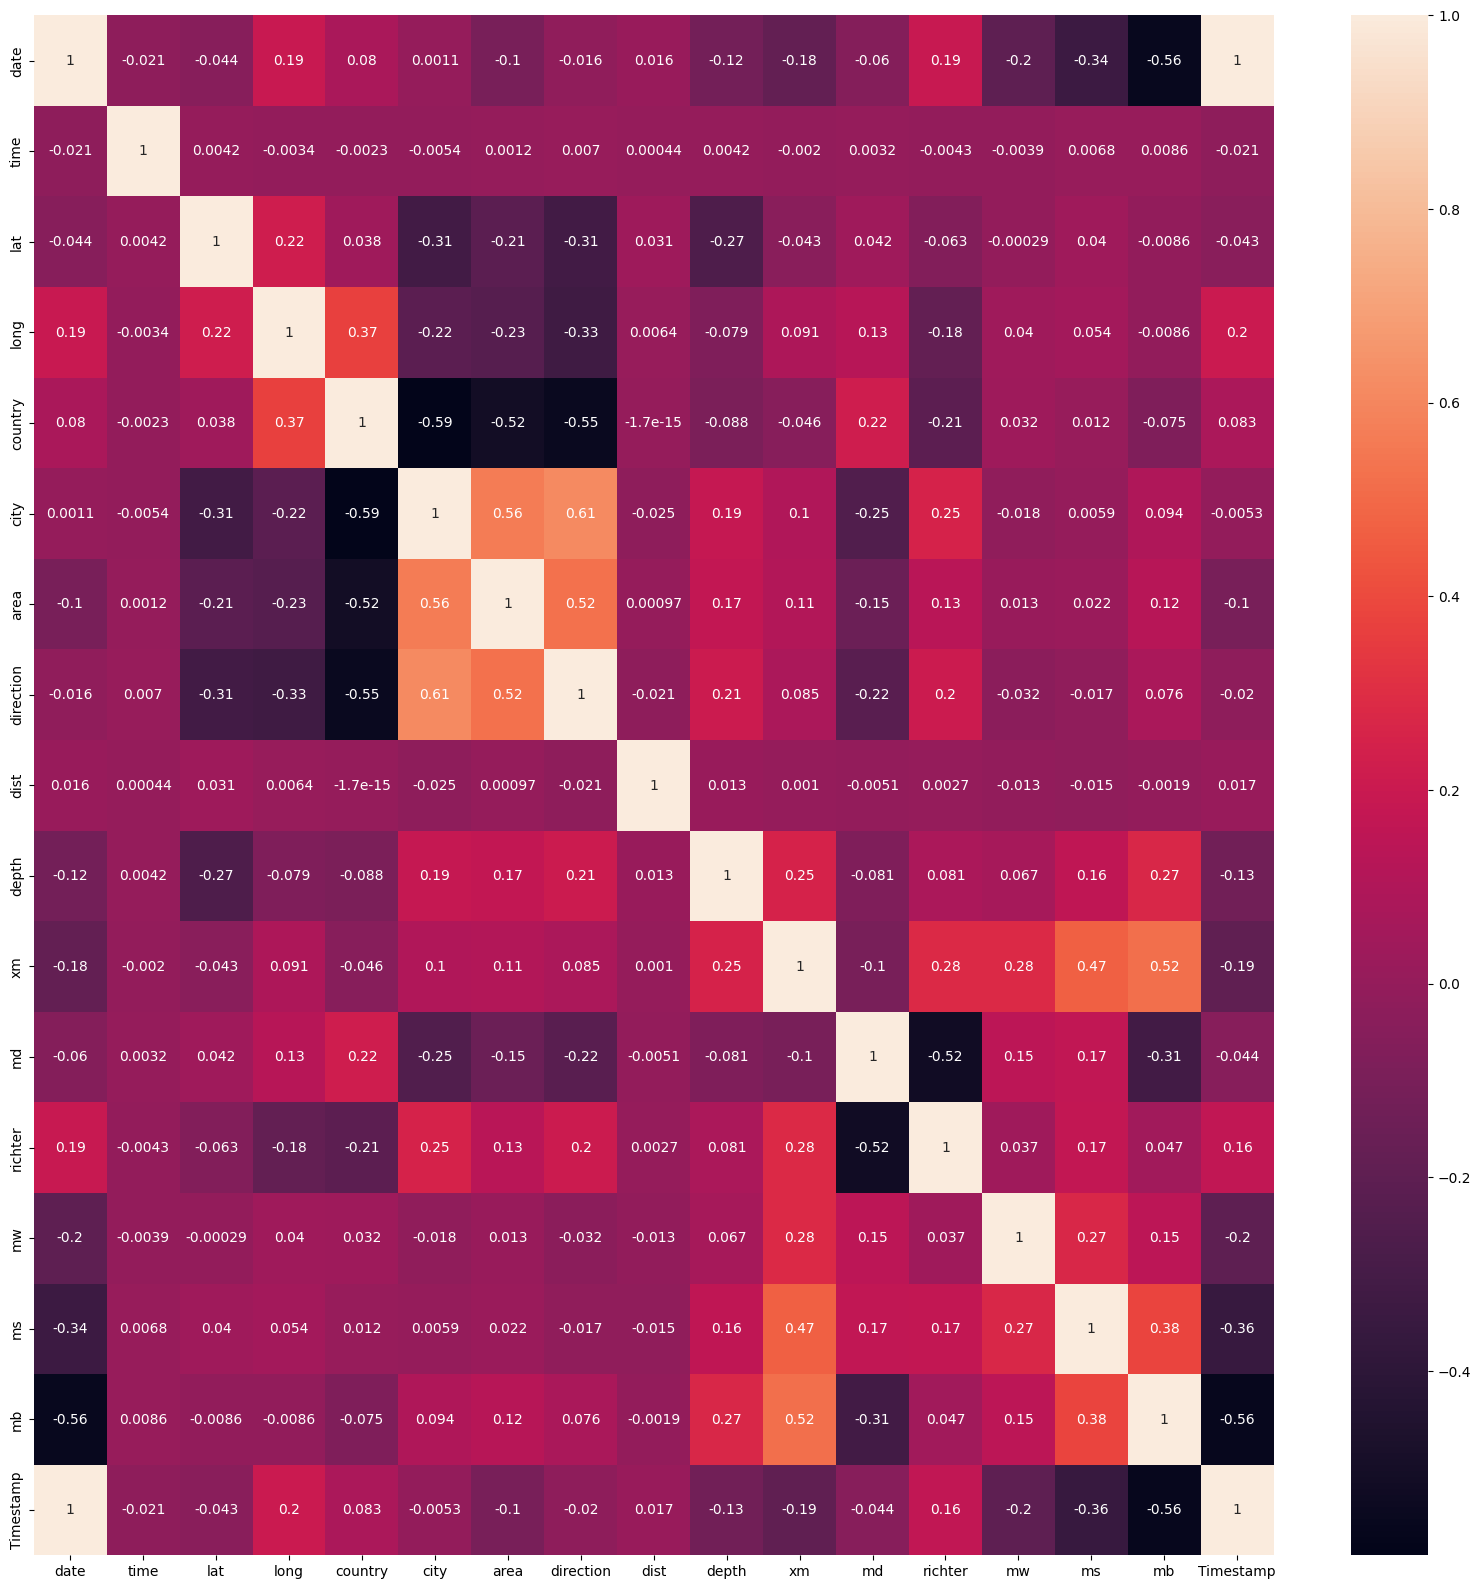

In [37]:
plt.figure(figsize=(20,20))
dataplot=sns.heatmap(df.corr(),annot=True)
plt.show()

##Normalization of data

In [38]:
# Using MinMaxScaler
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(df)
df = pd.DataFrame(d, columns=df.columns)
df.head()

,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb,Timestamp
0,0.644888,0.295151,0.559904,0.743088,0.76,0.173913,0.116202,0.875,0.0,0.048077,0.150,0.554054,0.000000,0.553294,0.0,0.000000,0.701558
1,0.743720,0.052118,0.665262,0.396156,0.76,0.608696,0.132921,0.875,0.0,0.025000,0.125,0.513514,0.571429,0.553294,0.0,0.000000,0.789835
2,0.131840,0.693423,0.532210,0.312542,0.76,0.673913,0.459856,0.750,0.0,0.000000,0.050,0.000000,0.000000,0.553294,0.0,0.544118,0.175347
3,0.519961,0.528707,0.585792,0.610249,0.76,0.869565,0.511868,0.750,0.0,0.048077,0.000,0.472973,0.000000,0.553294,0.0,0.000000,0.572077
4,0.581013,0.960981,0.665864,0.401214,0.76,0.804348,0.688751,0.750,0.0,0.033654,0.200,0.581081,0.000000,0.553294,0.0,0.000000,0.635783


##Splitting the Dataset

In [39]:
y=np.array(df['xm'])
X=np.array(df.drop('xm',axis=1))
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

##Creating Models

#1.Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
start1 = time.time()
linear=LinearRegression()
linear.fit(X_train,y_train)
ans1 = linear.predict(X_test)
end1 = time.time()
t1 = end1-start1

In [41]:
accuracy1=linear.score(X_test,y_test)
print("Accuracy of Linear Regression model is:",accuracy1)

Accuracy of Linear Regression model is: 0.46477676199444495


In [42]:
from sklearn import metrics
print("Linear Regression")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ans1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ans1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ans1)))

Linear Regression
Mean Absolute Error: 0.061462944917726865
Mean Squared Error: 0.006932963819897209
Root Mean Squared Error: 0.08326442109266843


Text(0, 0.5, 'Predicted Magnitude')

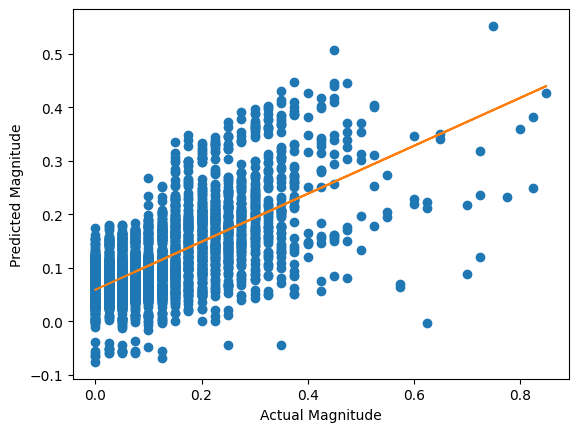

In [43]:
plt.plot(y_test, ans1, 'o')
m, b = np.polyfit(y_test,ans1, 1)
plt.plot(y_test, m*y_test + b)
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")

#2.Decision Tree

In [44]:
from sklearn.tree import DecisionTreeRegressor
start2 = time.time()
regressor = DecisionTreeRegressor(random_state = 40)
regressor.fit(X_train,y_train)
ans2 = regressor.predict(X_test)
end2 = time.time()
t2 = end2-start2

In [45]:
accuracy2=regressor.score(X_test,y_test)
print("Accuracy of Decision Tree model is:",accuracy2)

Accuracy of Decision Tree model is: 0.9871288627698176


In [46]:
print("Decision Tree")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ans2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ans2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ans2)))

Decision Tree
Mean Absolute Error: 0.0009110021023128287
Mean Squared Error: 0.00016672506423732775
Root Mean Squared Error: 0.012912206017459904


#3.KNN Model

In [47]:
from sklearn.neighbors import KNeighborsRegressor
start3 = time.time()
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, y_train)
ans3 = knn.predict(X_test)
end3 = time.time()
t3 = end3-start3

C:\Users\ksrad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "C:\Users\ksrad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [48]:
accuracy3=knn.score(X_test,y_test)
print("Accuracy of KNN model is:",accuracy3)

Accuracy of KNN model is: 0.6465199131647078


In [49]:
print("KNN Model")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ans3))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ans3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ans3)))

KNN Model
Mean Absolute Error: 0.04727964650003893
Mean Squared Error: 0.004578771023125437
Root Mean Squared Error: 0.06766661675542407


In [50]:
import random
info = {}
for i in range(10):
  k = random.randint(2,10)
  startk = time.time()
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(X_train, y_train)
  ans3 = knn.predict(X_test)
  endk = time.time()
  tk = endk-startk
  acc3=knn.score(X_test,y_test)
  info[k] = [acc3,tk]

for i in info:
  print("for k =",i,": accuracy =",info[i][0])

for k = 4 : accuracy = 0.6580850582525545
for k = 10 : accuracy = 0.624439601224009
for k = 7 : accuracy = 0.6431338159319651
for k = 9 : accuracy = 0.6314840713911182
for k = 8 : accuracy = 0.6355552849600008
for k = 3 : accuracy = 0.6596887846696982
for k = 6 : accuracy = 0.6465199131647078
for k = 5 : accuracy = 0.6501286779893419


Text(0.5, 1.0, 'Accuracy for different values of k')

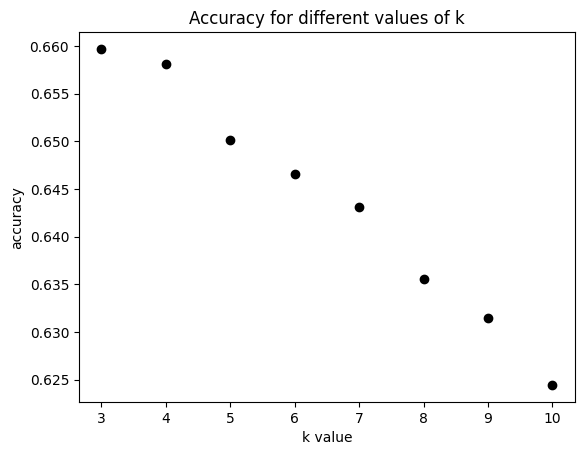

In [51]:
x = list(info.keys())
yacc = []
for i in info:
  yacc.append(info[i][0])
plt.plot(x, yacc, 'o', color='black');
plt.xlabel("k value")
plt.ylabel("accuracy");
plt.title("Accuracy for different values of k")

Text(0.5, 1.0, 'Execution time for different values of k')

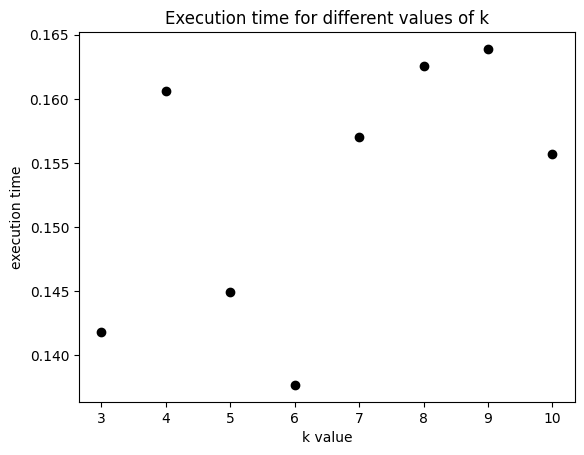

In [52]:
yt = []
for i in info:
  yt.append(info[i][1])
plt.plot(x, yt, 'o', color='black');
plt.xlabel("k value")
plt.ylabel("execution time");
plt.title("Execution time for different values of k")

##Comparison Graphs

###1.Accuracy

In [53]:
models = ["linear regression","decision tree","knn"]
accuracies = [accuracy1,accuracy2,accuracy3]

Text(0.5, 1.0, 'Accuracy Comparison Graph')

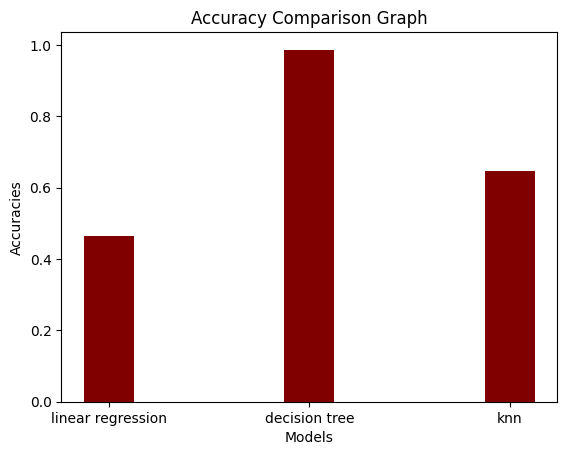

In [54]:
plt.bar(models, accuracies, color ='maroon',
        width = 0.25)
plt.xlabel("Models")
plt.ylabel("Accuracies")
plt.title("Accuracy Comparison Graph")

###2.Execution Time

Text(0.5, 1.0, 'Execution Time Comparison Graph')

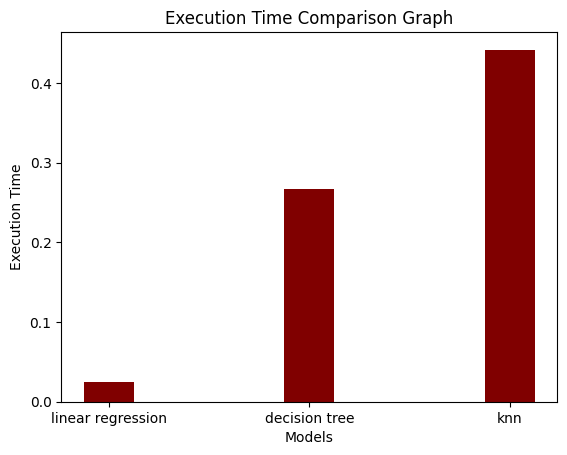

In [55]:
times = [t1,t2,t3]
plt.bar(models, times, color ='maroon',
        width = 0.25)
plt.xlabel("Models")
plt.ylabel("Execution Time")
plt.title("Execution Time Comparison Graph")

In [56]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import GridSearchCV

# Load and preprocess your data
# Assuming X is the feature matrix and y is the target variable

# Split data into train and test sets

# Initialize the individual models
dt_reg = DecisionTreeRegressor()
knn_reg = KNeighborsRegressor()

# Create the ensemble model
ensemble_model = VotingRegressor(estimators=[('dt', dt_reg), ('knn', knn_reg)])

# Define the hyperparameter space for Decision Tree and KNN
params = {
    'dt__max_depth': [None, 5, 10, 15],
    'dt__min_samples_split': [2, 5, 10],
    'dt__max_features': ['sqrt', 'log2', None],
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=ensemble_model,
                           param_grid=params,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1,
                           verbose=1)

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best score: {-grid_search.best_score_:.2f}")

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model's performance
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best hyperparameters: {'dt__max_depth': 15, 'dt__max_features': None, 'dt__min_samples_split': 2, 'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'distance'}
Best score: 0.00
Mean Squared Error: 0.00
R-squared: 0.91


In [58]:
import joblib

# Save the best model to a file
joblib.dump(best_model, 'best_model.pkl')
# Load the model from the file
loaded_model = joblib.load('best_model.pkl')